## 회귀 (regression) 예측
- 수치형 값을 예측 (Y의 값이 연속된 수치로 표현)

In [54]:
import pandas as pd
import numpy as np

#작은숫자가 지수표현식이 아닌 일반 소수점 형식으로 출력
np.set_printoptions(suppress=True)

In [55]:
from sklearn.datasets import fetch_openml

data = fetch_openml(name='boston', version=1, parser='auto', as_frame=True)
# boston은 sklearn.utils.Bunch 객체
# parser='auto'는 경고 끄기 위한 인자
# Python의 딕셔너리와 유사한 구조, 속성에 점(.)으로 접근 가능
print(data.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [56]:
#데이터셋에 대한 설명
print(data['DESCR'])

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [57]:
data

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
 0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
 1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
 2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
 3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
 4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
 ..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
 501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
 502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
 503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
 504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
 505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   9.14  
 2       

In [58]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 컬럼 소개
속성 수 : 13

- CRIM: 범죄율
- ZN: 25,000 평방 피트 당 주거용 토지의 비율
- INDUS: 비소매(non-retail) 비즈니스 면적 비율
- CHAS: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
- NOX: 산화 질소 농도 (천만 분의 1)
- RM:주거 당 평균 객실 수
- AGE: 1940 년 이전에 건축된 자가 소유 점유 비율
- DIS: 5 개의 보스턴 고용 센터까지의 가중 거리
- RAD: 고속도로 접근성 지수
- TAX: 10,000 달러 당 전체 가치 재산 세율
- PTRATIO 도시 별 학생-교사 비율
- B: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
- LSTAT: 인구의 낮은 지위
- MEDV: 자가 주택의 중앙값 (1,000 달러 단위)

In [59]:
df2 = data.frame
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Train / Test 데이터 셋 분할

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1), df['MEDV'], random_state=44)

In [61]:
X_train.shape, X_test.shape

((379, 13), (127, 13))

## 평가 지표 만들기

### MSE(Mean Squared Error)
예측값과 실제값의 차이에 대한 제곱에 대한 평균

### MAE(Mean Absolute Error)
예측값과 실제값의 차이에 대한 절대값에 대한 평균

### RMSE (Root Mean Squared Error)
예측값과 실제값의 차이에 대한 제곱에 대해 평균을 낸 뒤 루트를 씌운값

In [62]:
import numpy as np

In [63]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

def my_mse(pred,actual):
  return((pred - actual)**2).mean()

my_mse(pred, actual)

4.0

In [64]:
def my_mae(pred, actual):
  return np.abs(pred-actual).mean()

my_mae(pred,actual)

2.0

In [65]:
def my_rmse(pred,actual):
  return np.sqrt(my_mse(pred,actual))

my_rmse(pred,actual)

2.0

## sklearn의 평가지표 활용하기

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
my_mae(pred, actual), mean_absolute_error(pred,actual)

(2.0, 2.0)

In [67]:
my_mse(pred,actual), mean_squared_error(pred,actual)

(4.0, 4.0)

### 모델별 성능 확인을 위한 함수

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

my_prediction ={}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
          ]

def plot_prediction (name_,pred,actual):
	df = pd.DataFrame({'prediction': pred, 'actual': y_test})
	df = df.sort_values(by='actual').reset_index(drop=True)

	plt.figure(figsize=(12,9))
	plt.scatter(df.index, df['prediction'], marker='x', color='r')
	plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
	plt.title(name_,fontsize=15)
	plt.legend(['prediction', 'actual'], fontsize=12)
	plt.show()

def mse_eval(name_, pred, actual):
	global predictions
	global colors

	plot_prediction(name_, pred, actual)

	mse = mean_squared_error(pred, actual)
	my_prediction[name_] = mse

	y_value = sorted(my_prediction.items(), key=lambda x:x[1], reverse=True)

	df = pd.DataFrame(y_value, columns=['model', 'mse'])
	print(df)
	min_=df['mse'].min()-10
	max_=df['mse'].max()+10

	length = len(df)

	plt.figure(figsize=(10,length))
	ax = plt.subplot()
	ax.set_yticks(np.arange(len(df)))
	ax.set_yticklabels(df['model'], fontsize=15)
	bars = ax.barh(np.arange(len(df)), df['mse'])

	for i,v in enumerate(df['mse']):
		idx = np.random.choice(len(colors))
		bars[i].set_color(colors[idx])
		ax.text(v+2, i, str(round(v,3)), color='k', fontsize=15, fontweight='bold')

	plt.title('MSE Error', fontsize=18)
	plt.xlim(min_, max_)

	plt.show

def remove_model(name_):
	global my_predictions
	try:
		del my_predictions[name_]
	except KeyError:
		return False
	return True

## Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1)

In [70]:
# 데이터의 CHAS와 RAD가 category 타입이라서 그대로 predict를 하면 TypeError가 발생
# 마찬가지로 train 데이터도 타입을 변경해서 fit을 해주는게 일관성 유지에 도움

X_test.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object

In [71]:
#astype으로 타입 변경
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [72]:
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [73]:
pred = model.predict(X_test)

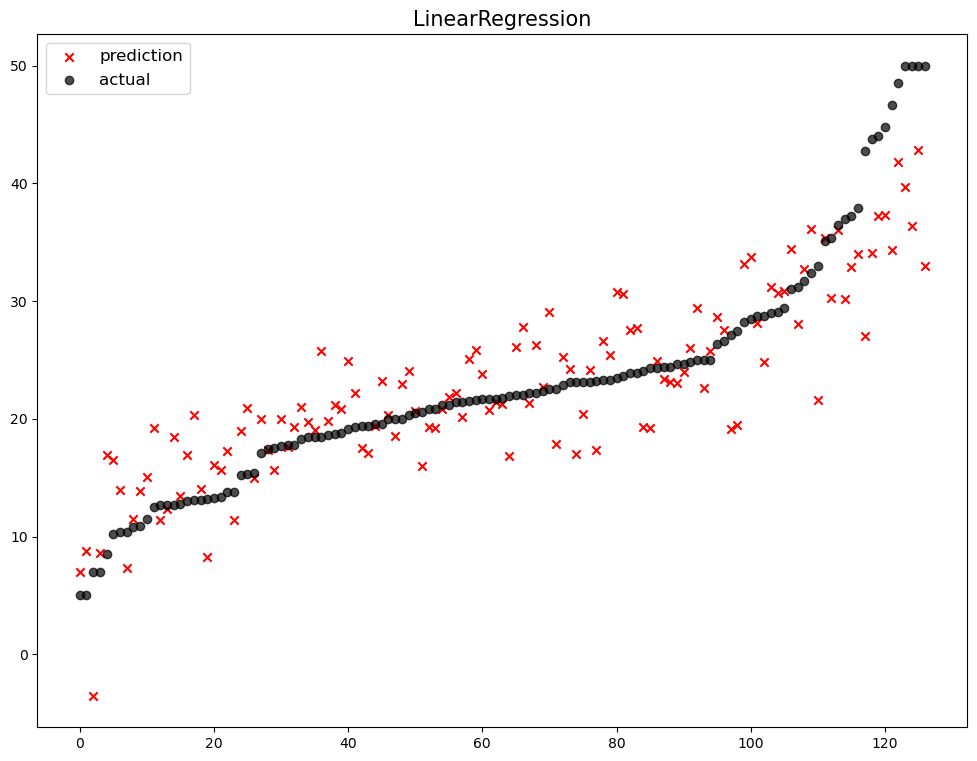

              model        mse
0  LinearRegression  23.732245


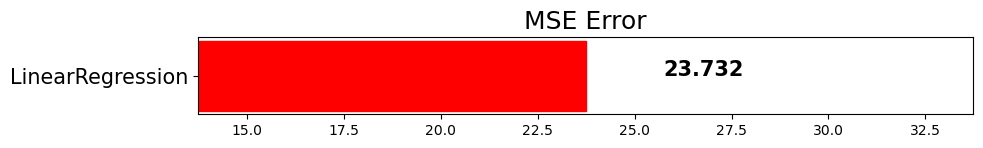

In [74]:
mse_eval('LinearRegression', pred, y_test)

## 규제 (Regularization)
학습이 과대적합 되는것을 방지하고자 일종의 페널티를 부여하는것

#### L2규제 (L2 Regularization)
- 각 가중치 제곱의 합에 규제 강도(Regulariztion Strength) λ 를 곱한다.
- λ를 크게 하면 가중치가 더 많이 감소되고, λ를 작게 하면 가중치가 증가한다.

#### L1규제 (L1 Regularization)
- 가중치의 제곱의 합이 아닌 가중치의 합을 더한 값에 규제 강도 λ 를 곱하여 오차에 더한다.
- 어떤 가중치는 실제로 0이 되기도한다. 즉 모델에서 완전히 제외 되는 특성이 생긴다.

#### L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2규제가 더 많이 사용된다


In [75]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

def plot_coef(columns, coef):
	coef_df = pd.DataFrame(list(zip(columns, coef)))
	coef_df.columns=['feature', 'coef']
	coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
	
	fig, ax = plt.subplots(figsize=(9,7))
	ax.barh(np.arange(len(coef_df)), coef_df['coef'])
	idx = np.arange(len(coef_df))
	ax.set_yticks(idx)
	ax.set_yticklabels(coef_df['feature'])
	fig.tight_layout()
	plt.show()

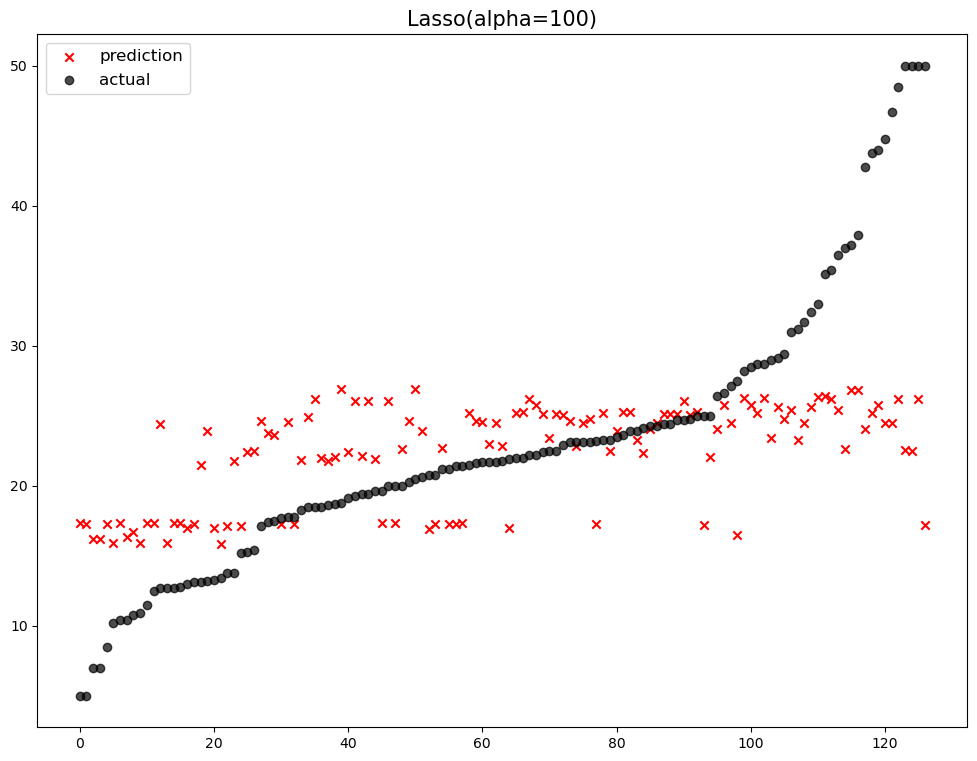

              model        mse
0  Lasso(alpha=100)  71.850606
1  LinearRegression  23.732245


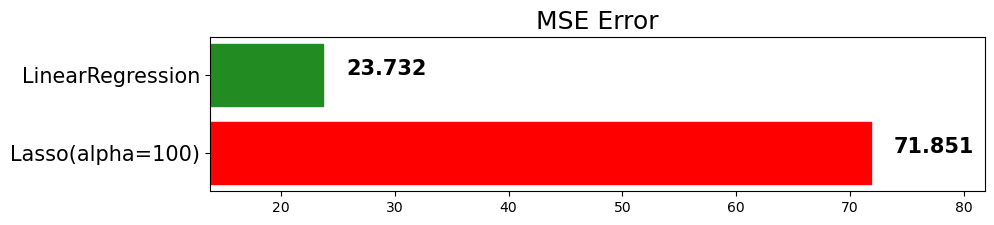

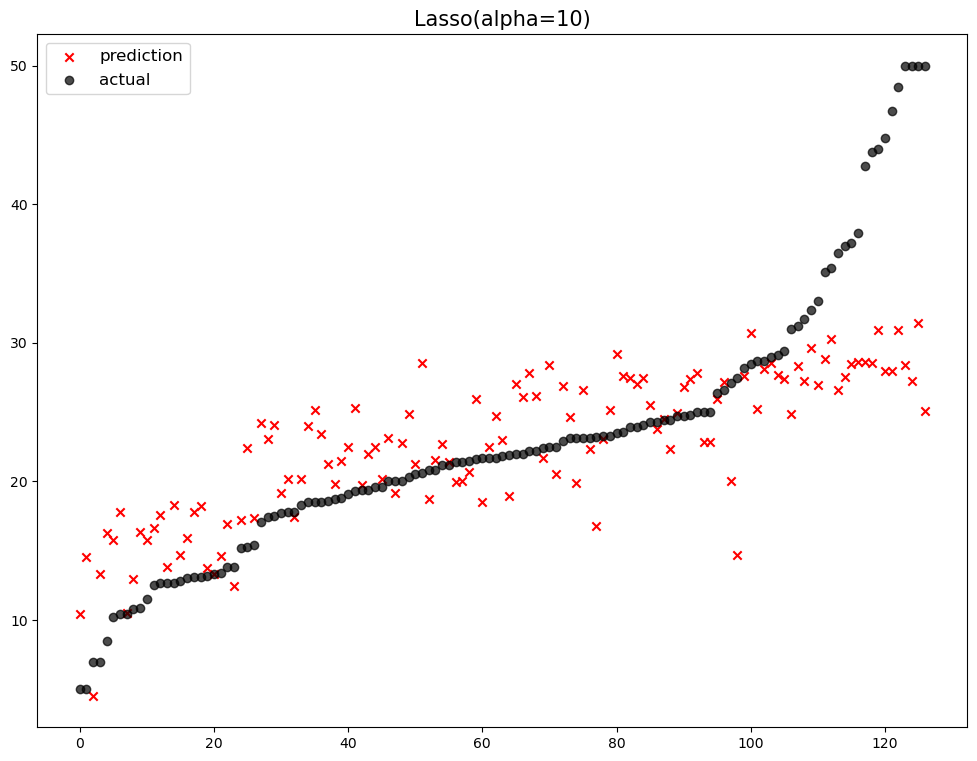

              model        mse
0  Lasso(alpha=100)  71.850606
1   Lasso(alpha=10)  44.433756
2  LinearRegression  23.732245


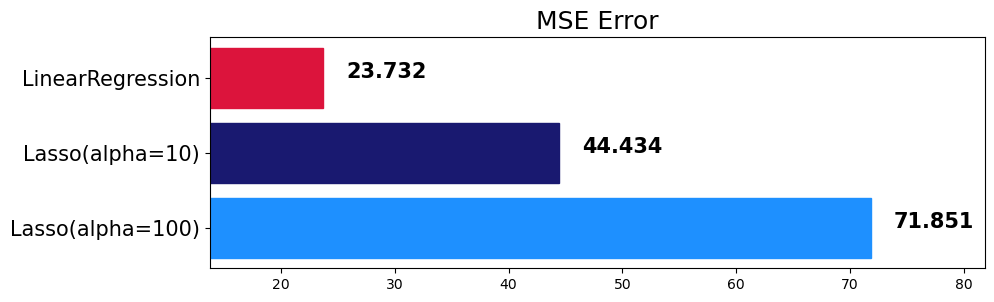

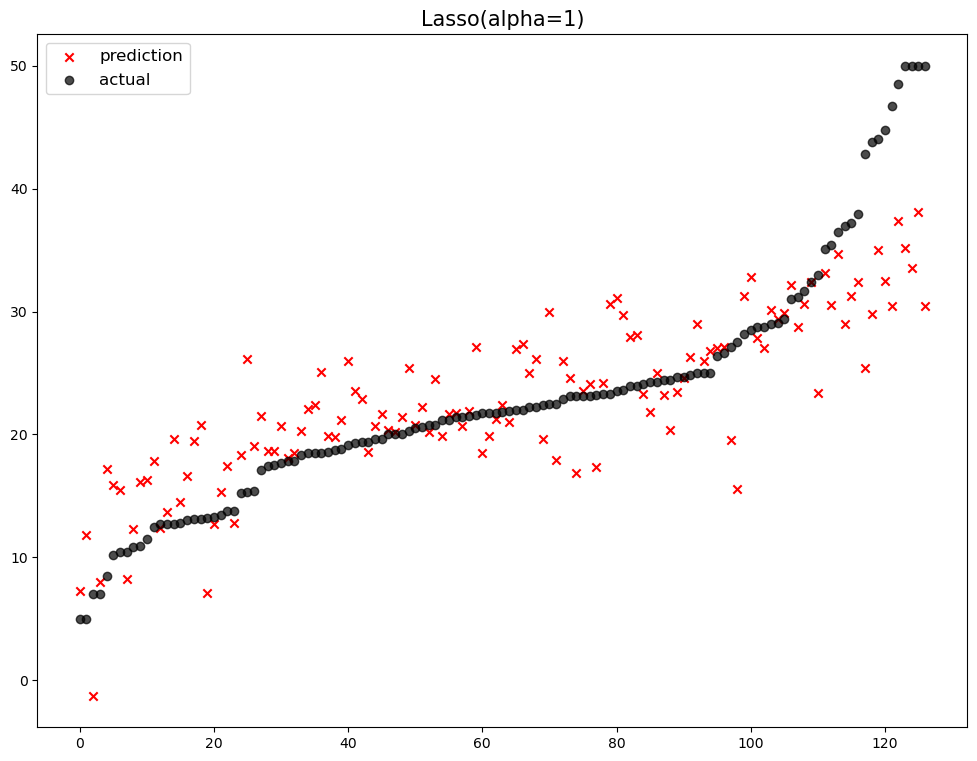

              model        mse
0  Lasso(alpha=100)  71.850606
1   Lasso(alpha=10)  44.433756
2    Lasso(alpha=1)  32.294884
3  LinearRegression  23.732245


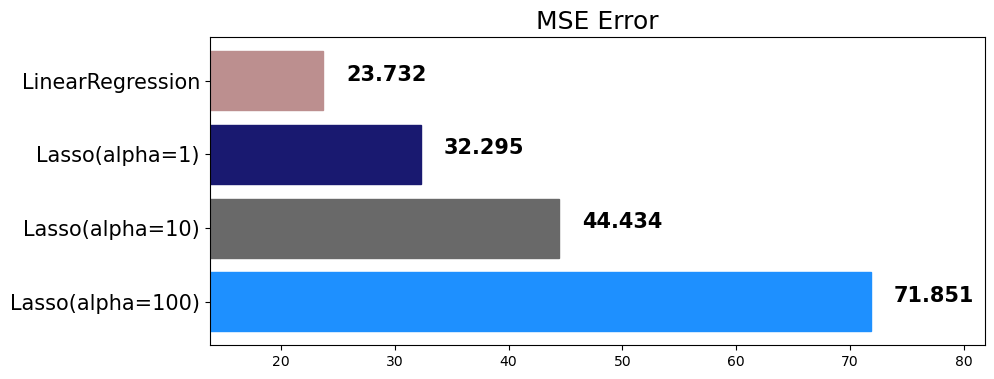

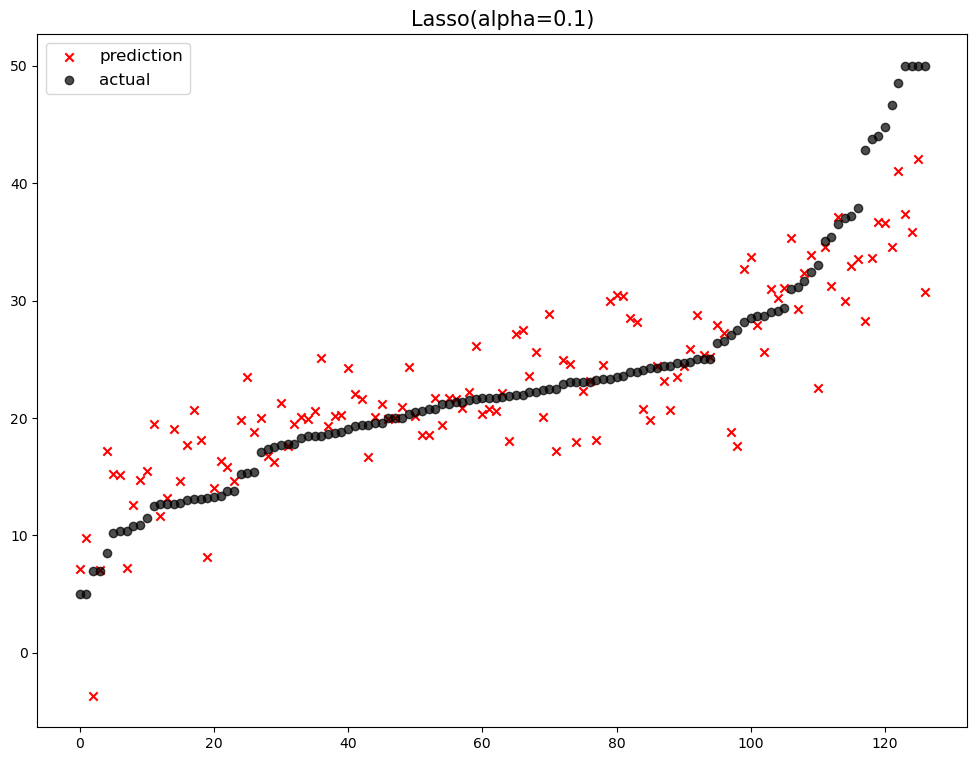

              model        mse
0  Lasso(alpha=100)  71.850606
1   Lasso(alpha=10)  44.433756
2    Lasso(alpha=1)  32.294884
3  Lasso(alpha=0.1)  25.241998
4  LinearRegression  23.732245


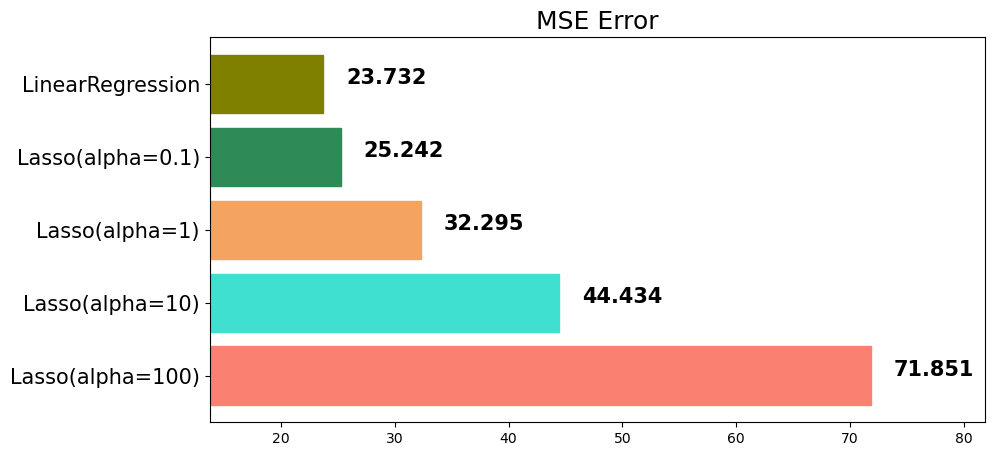

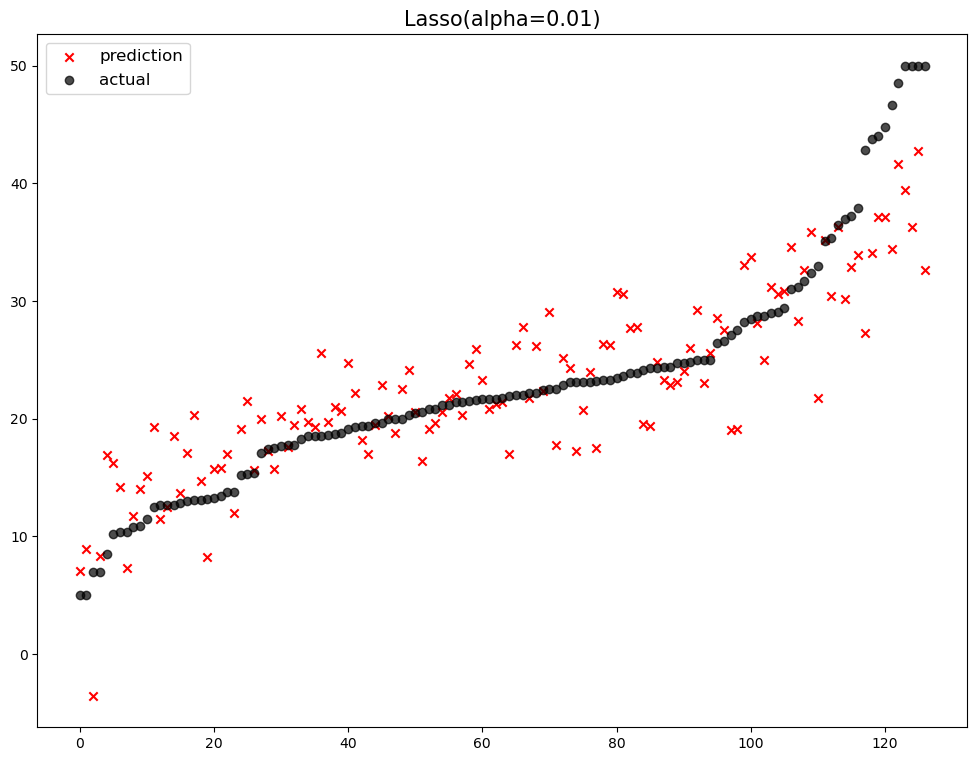

               model        mse
0   Lasso(alpha=100)  71.850606
1    Lasso(alpha=10)  44.433756
2     Lasso(alpha=1)  32.294884
3   Lasso(alpha=0.1)  25.241998
4   LinearRegression  23.732245
5  Lasso(alpha=0.01)  23.671386


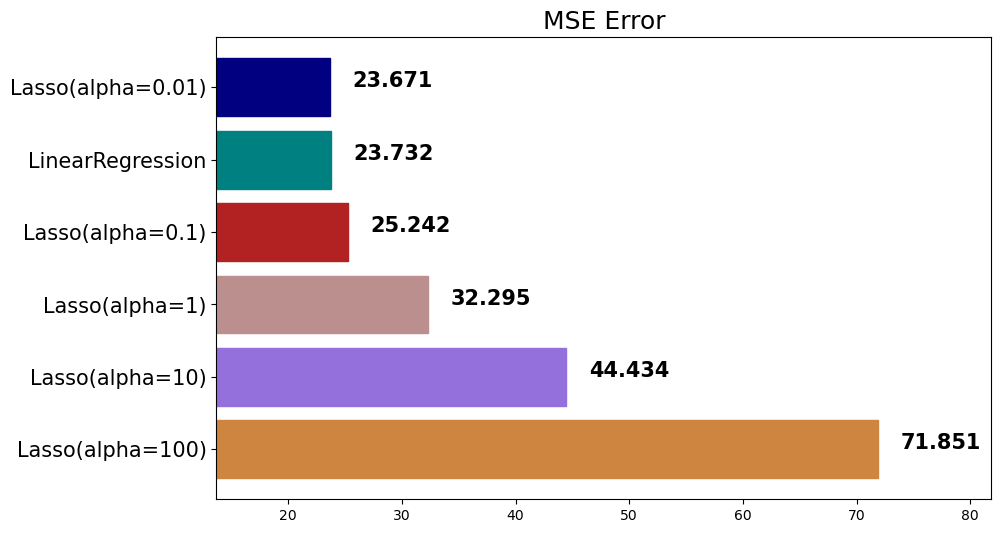

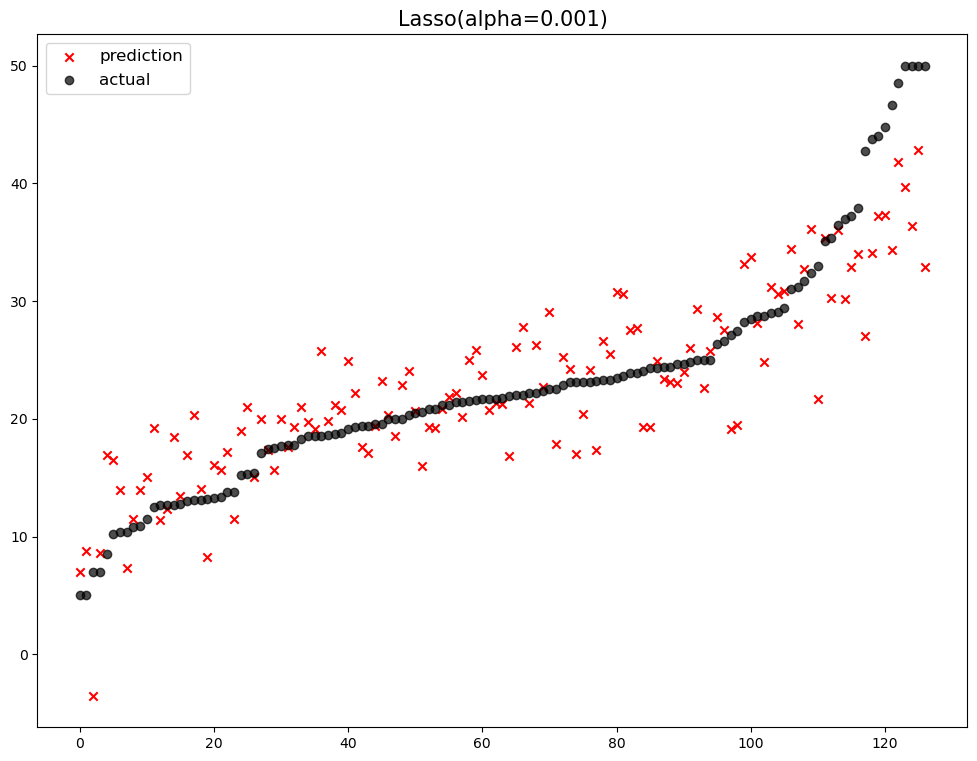

                model        mse
0    Lasso(alpha=100)  71.850606
1     Lasso(alpha=10)  44.433756
2      Lasso(alpha=1)  32.294884
3    Lasso(alpha=0.1)  25.241998
4    LinearRegression  23.732245
5  Lasso(alpha=0.001)  23.721040
6   Lasso(alpha=0.01)  23.671386


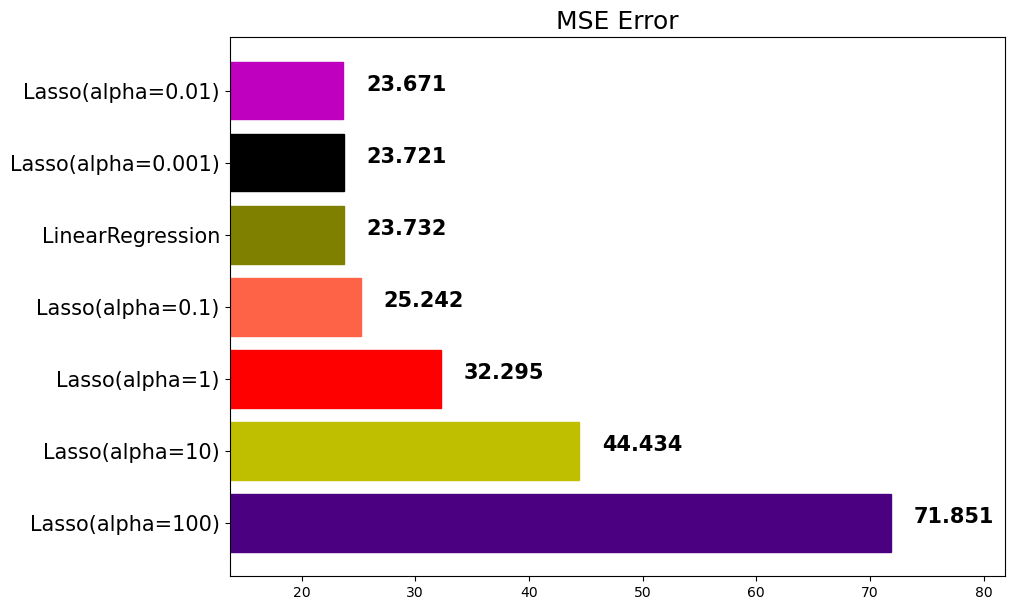

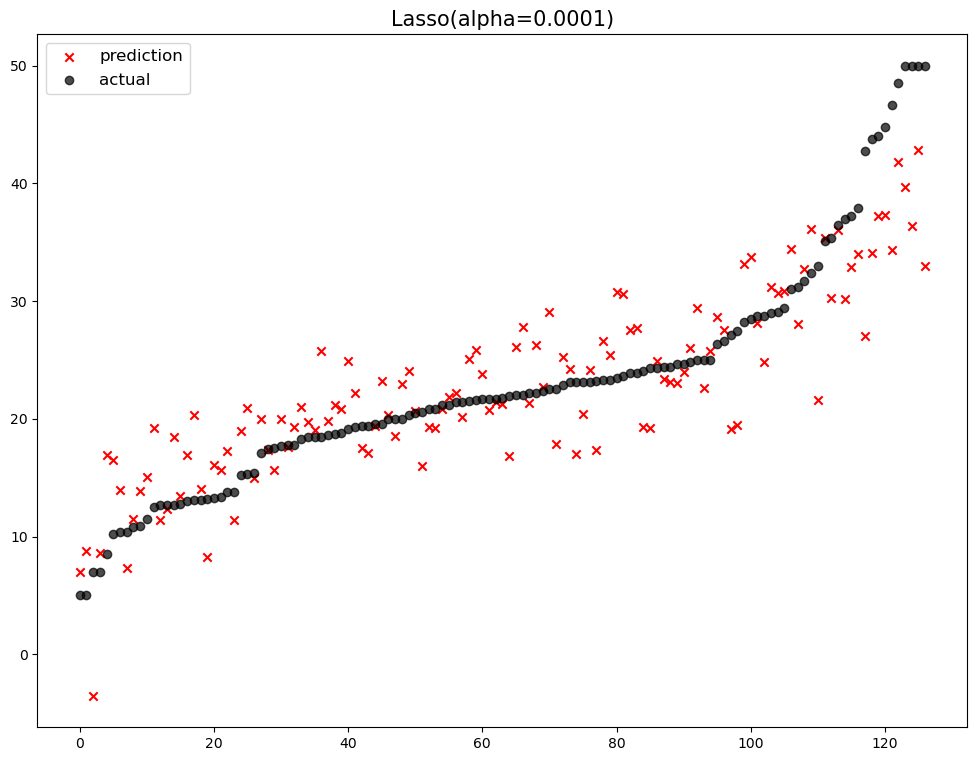

                 model        mse
0     Lasso(alpha=100)  71.850606
1      Lasso(alpha=10)  44.433756
2       Lasso(alpha=1)  32.294884
3     Lasso(alpha=0.1)  25.241998
4     LinearRegression  23.732245
5  Lasso(alpha=0.0001)  23.731074
6   Lasso(alpha=0.001)  23.721040
7    Lasso(alpha=0.01)  23.671386


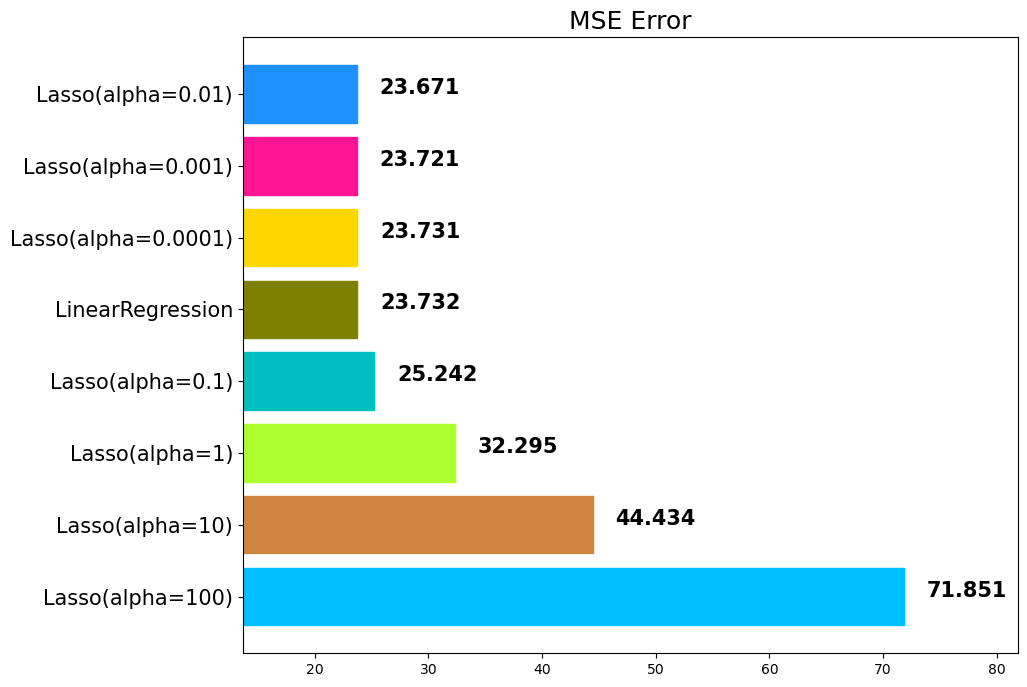

In [76]:
from sklearn.linear_model import Lasso

#값이 클 수록 더 큰 규제를 나타냄
alphas =[100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [77]:
lasso_001 = Lasso(alpha=0.01)
lasso_001.fit(X_train, y_train)
lasso_pred_001 = lasso_001.predict(X_test)

lasso_100 = Lasso(alpha=100)
lasso_100.fit(X_train, y_train)
lasso_pred_100 = lasso_100.predict(X_test)

## Lasso에서 .coef_ 속성
모델이 학습한 각 특성에 대한 계수(coefficient)를 나타낸다.
- Numpy배열로 반환되며, 각 요소는 해당 특성의 계수를 나타낸다.
- Lasso는 일부 겨수를 정확히 0 으로 만들어서 특성 선택 효과를 가진다.
- fit으로 학습 후에 접근 가능하다.

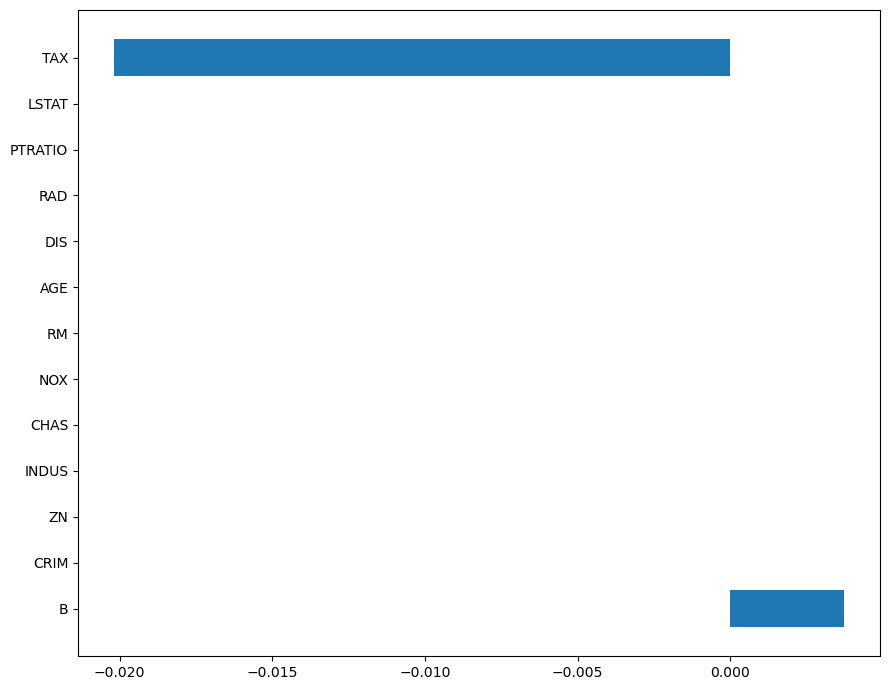

In [78]:
plot_coef(X_train.columns, lasso_100.coef_)

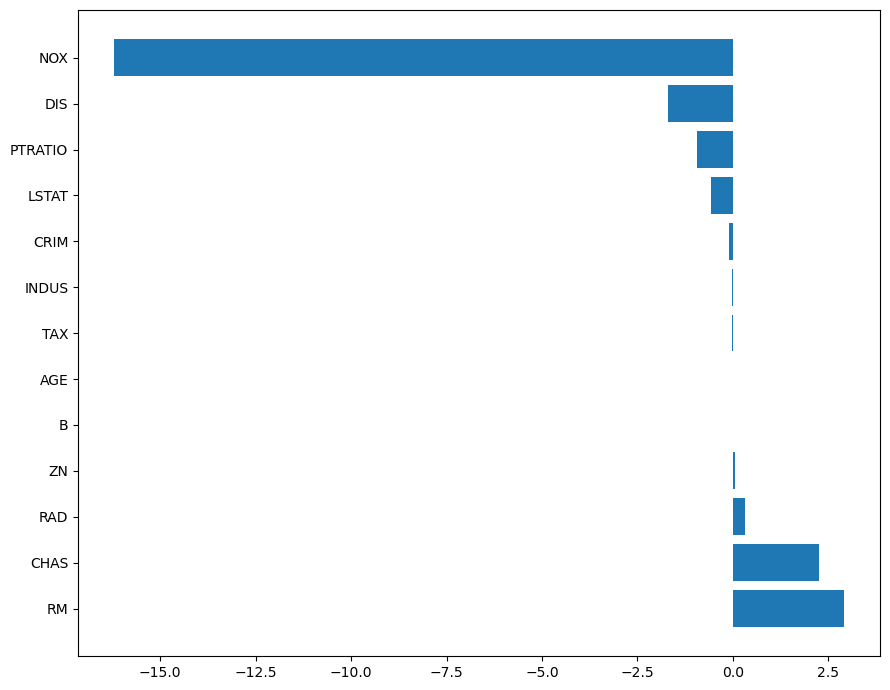

In [79]:
plot_coef(X_train.columns, lasso_001.coef_)

### ElasticNet

**l1_ratio (default=0.5)**
- l1_ratio = 0 [L2 규제만 사용]
- l1_ratio = 1 [L1 규제만 사용]
- 0 < l1_ratio < 1 [L1,L2 규제 혼합사용]

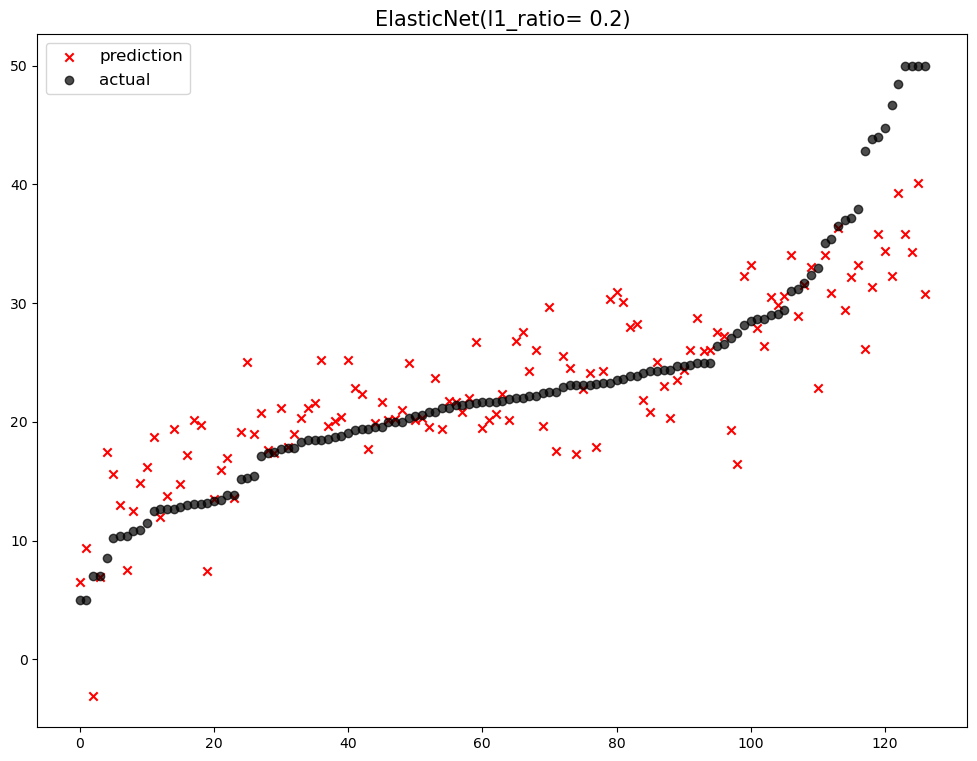

                       model        mse
0           Lasso(alpha=100)  71.850606
1            Lasso(alpha=10)  44.433756
2             Lasso(alpha=1)  32.294884
3  ElasticNet(l1_ratio= 0.2)  28.843444
4           Lasso(alpha=0.1)  25.241998
5           LinearRegression  23.732245
6        Lasso(alpha=0.0001)  23.731074
7         Lasso(alpha=0.001)  23.721040
8          Lasso(alpha=0.01)  23.671386


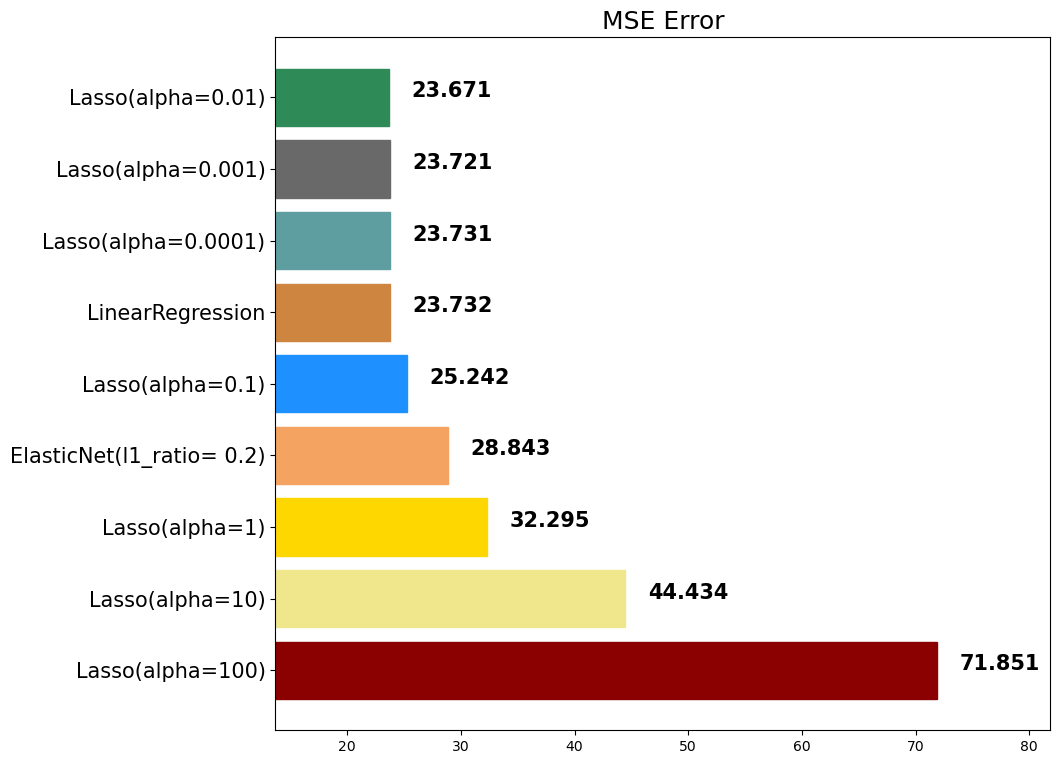

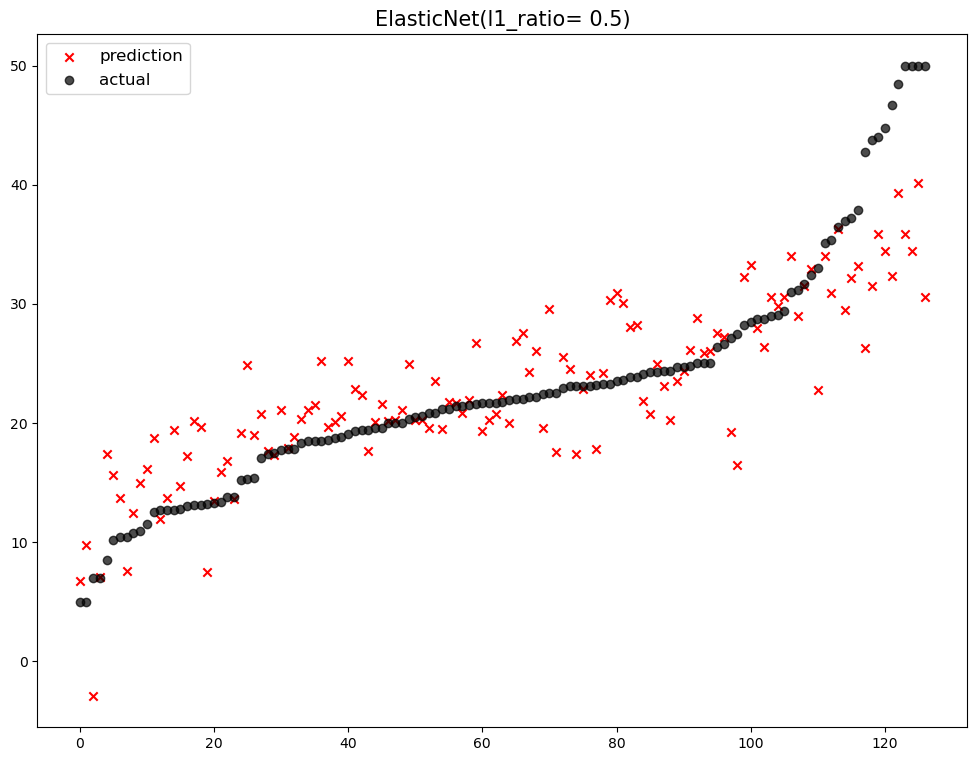

                       model        mse
0           Lasso(alpha=100)  71.850606
1            Lasso(alpha=10)  44.433756
2             Lasso(alpha=1)  32.294884
3  ElasticNet(l1_ratio= 0.2)  28.843444
4  ElasticNet(l1_ratio= 0.5)  28.710359
5           Lasso(alpha=0.1)  25.241998
6           LinearRegression  23.732245
7        Lasso(alpha=0.0001)  23.731074
8         Lasso(alpha=0.001)  23.721040
9          Lasso(alpha=0.01)  23.671386


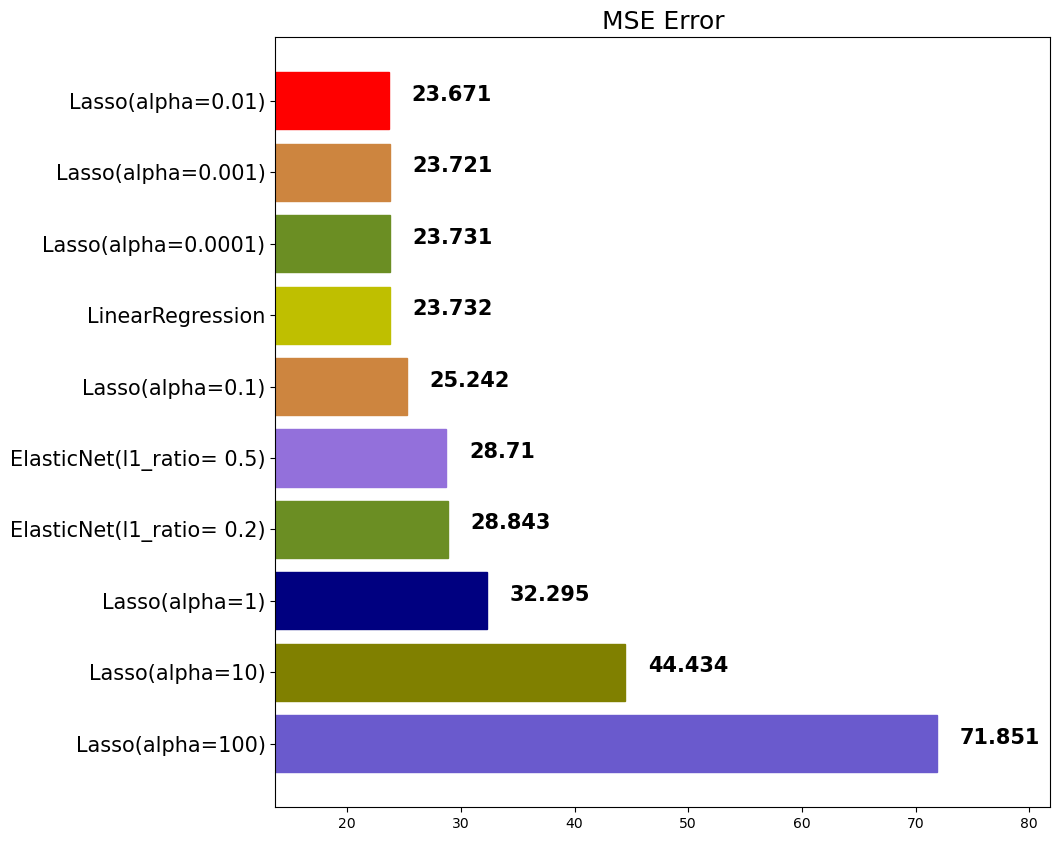

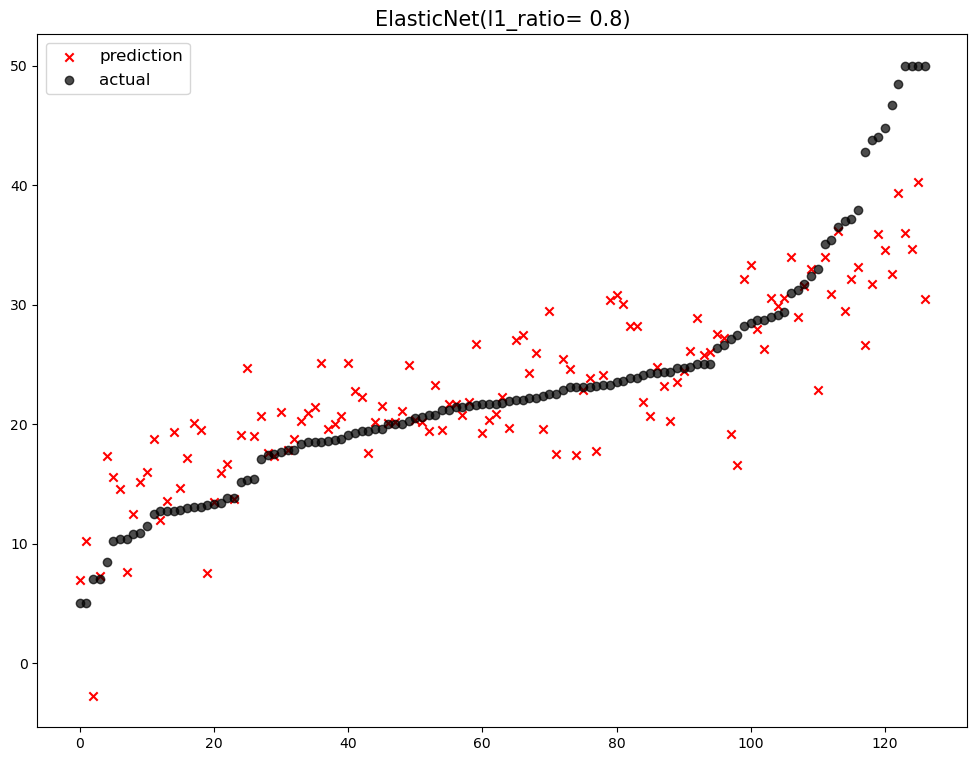

                        model        mse
0            Lasso(alpha=100)  71.850606
1             Lasso(alpha=10)  44.433756
2              Lasso(alpha=1)  32.294884
3   ElasticNet(l1_ratio= 0.2)  28.843444
4   ElasticNet(l1_ratio= 0.5)  28.710359
5   ElasticNet(l1_ratio= 0.8)  28.369449
6            Lasso(alpha=0.1)  25.241998
7            LinearRegression  23.732245
8         Lasso(alpha=0.0001)  23.731074
9          Lasso(alpha=0.001)  23.721040
10          Lasso(alpha=0.01)  23.671386


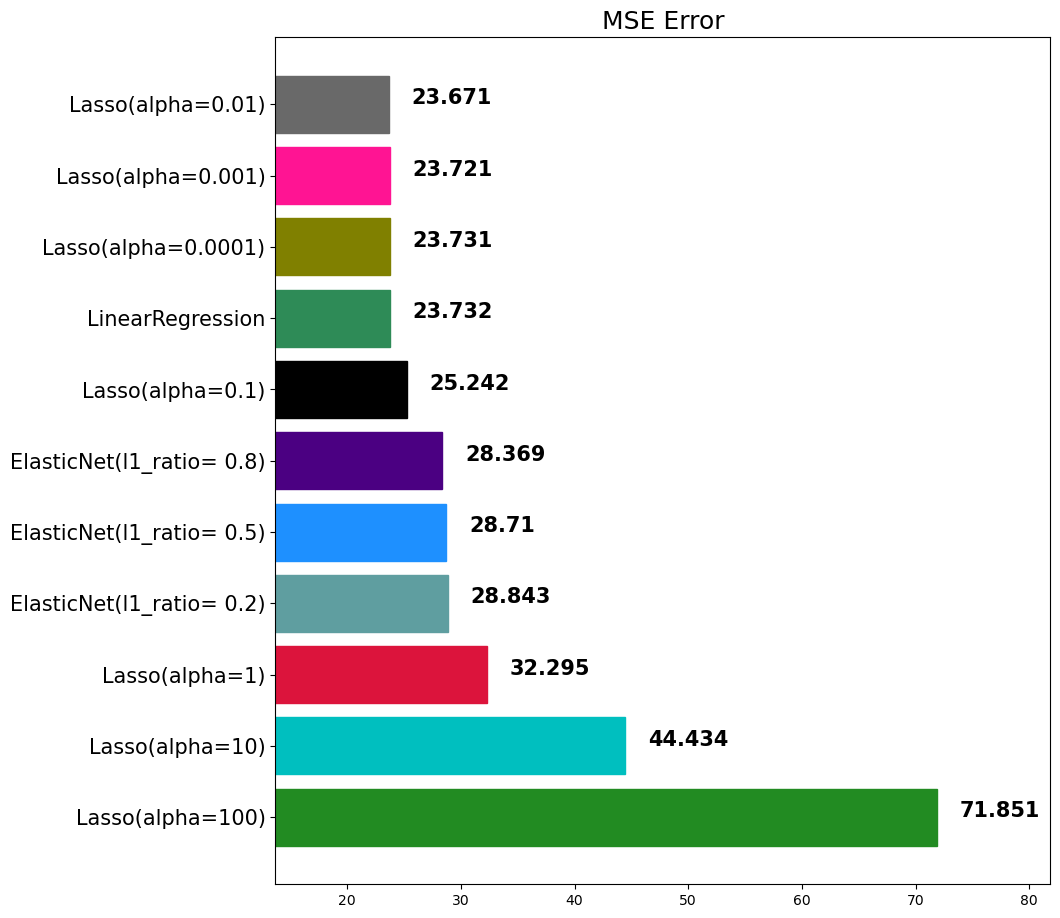

In [80]:
from sklearn.linear_model import ElasticNet

ratios = [0.2, 0.5, 0.8]

for ratio in ratios:
  elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
  elasticnet.fit(X_train, y_train)
  pred = elasticnet.predict(X_test)
  mse_eval(f'ElasticNet(l1_ratio= {ratio})', pred, y_test)

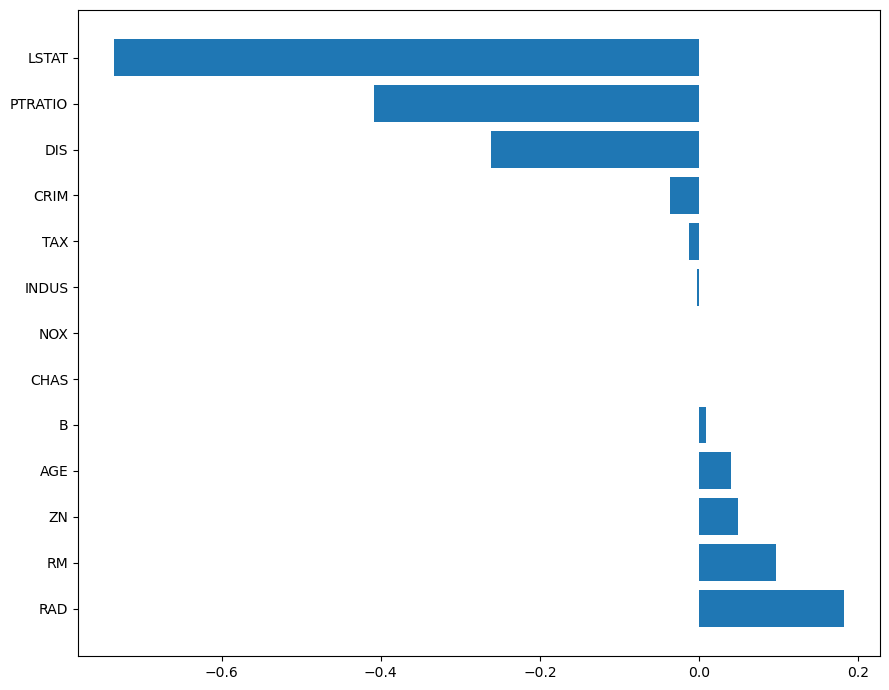

In [81]:
elasticnet_02 = ElasticNet(alpha=5, l1_ratio=0.2)
elasticnet_02.fit(X_train, y_train)
elasticnet_02_pred = elasticnet_02.predict(X_test)

elasticnet_08 = ElasticNet(alpha=5, l1_ratio=0.2)
elasticnet_08.fit(X_train, y_train)
elasticnet_08_pred = elasticnet_08.predict(X_test)

plot_coef(X_train.columns, elasticnet_02.coef_)

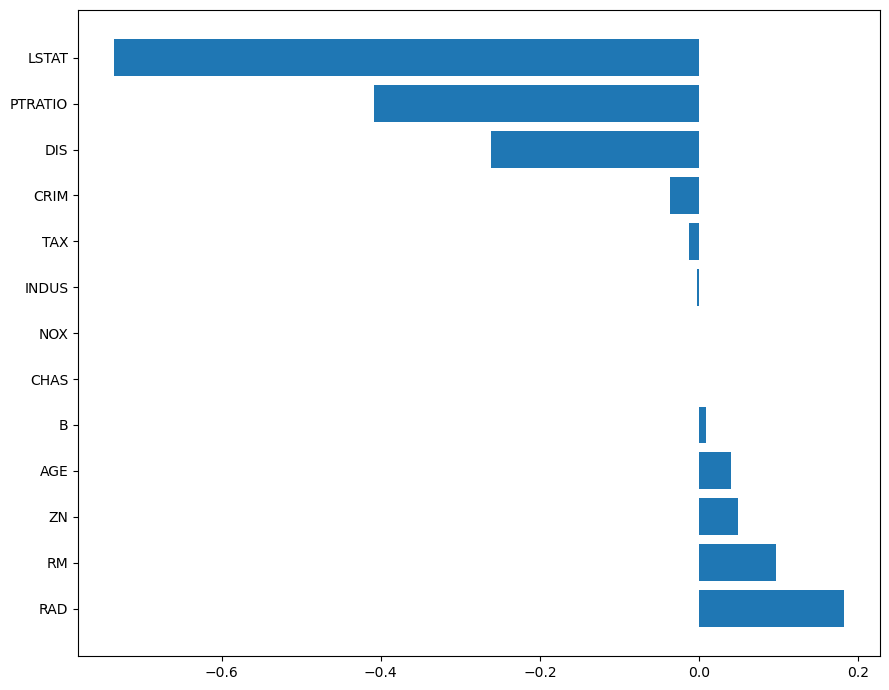

In [82]:
plot_coef(X_train.columns, elasticnet_08.coef_)

### Scaler

In [83]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.00000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.350535,11.55277,11.080686,0.065963,0.552477,6.279707,68.634828,3.835004,9.498681,408.683377,18.482058,357.069314,12.775937
std,7.182234,23.17574,6.907114,0.248546,0.113410,0.711652,28.055081,2.122223,8.695731,167.827765,2.206735,92.191157,7.261842
min,0.006320,0.00000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.520000,1.730000
25%,0.082545,0.00000,5.160000,0.000000,0.449000,5.886500,45.250000,2.100350,4.000000,284.000000,17.000000,375.990000,7.130000
50%,0.261690,0.00000,8.560000,0.000000,0.538000,6.193000,77.000000,3.317500,5.000000,330.000000,19.100000,391.930000,11.340000
75%,3.551845,20.00000,18.100000,0.000000,0.624000,6.617000,94.100000,5.287300,24.000000,666.000000,20.200000,396.220000,16.820000
max,73.534100,100.00000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Standard Scaler
평균을 0, 표준 편차를 1로 만들어주는 스케일러

In [84]:
std_scaler = StandardScaler()

In [85]:
std_scaler = std_scaler.fit_transform(X_train)
round(pd.DataFrame(std_scaler).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.47,-0.50,-1.54,-0.27,-1.48,-3.83,-2.35,-1.28,-0.98,-1.32,-2.67,-3.85,-1.52
25%,-0.46,-0.50,-0.86,-0.27,-0.91,-0.55,-0.83,-0.82,-0.63,-0.74,-0.67,0.21,-0.78
50%,-0.43,-0.50,-0.37,-0.27,-0.13,-0.12,0.30,-0.24,-0.52,-0.47,0.28,0.38,-0.20
75%,0.03,0.36,1.02,-0.27,0.63,0.47,0.91,0.69,1.67,1.54,0.78,0.43,0.56
max,9.78,3.82,2.42,3.76,2.81,3.52,1.12,3.91,1.67,1.80,1.60,0.43,3.47


### MinMaxScaler
min값과 max값을 0~1 사이로 정규화

In [86]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(X_train)

In [87]:
round(pd.DataFrame(minmax_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.05,0.12,0.39,0.07,0.34,0.52,0.68,0.25,0.37,0.42,0.63,0.90,0.30
std,0.10,0.23,0.25,0.25,0.23,0.14,0.29,0.19,0.38,0.32,0.23,0.23,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.13,0.45,0.44,0.09,0.13,0.19,0.47,0.95,0.15
50%,0.00,0.00,0.30,0.00,0.31,0.50,0.76,0.20,0.17,0.27,0.69,0.99,0.27
75%,0.05,0.20,0.65,0.00,0.49,0.59,0.94,0.38,1.00,0.91,0.81,1.00,0.42
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Robust Scaler
중앙값이 0, IQR이 1이 되도록 변환 <br>
**outlier 값 처리에 유용**

In [88]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(X_train)

In [89]:
round(pd.DataFrame(robust_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.89,0.58,0.19,0.07,0.08,0.12,-0.17,0.16,0.22,0.21,-0.19,-1.72,0.15
std,2.07,1.16,0.53,0.25,0.65,0.97,0.57,0.67,0.43,0.44,0.69,4.56,0.75
min,-0.07,0.00,-0.63,0.00,-0.87,-3.60,-1.52,-0.69,-0.20,-0.37,-2.03,-19.25,-0.99
25%,-0.05,0.00,-0.26,0.00,-0.51,-0.42,-0.65,-0.38,-0.05,-0.12,-0.66,-0.79,-0.43
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.95,1.00,0.74,0.00,0.49,0.58,0.35,0.62,0.95,0.88,0.34,0.21,0.57
max,21.12,5.00,1.48,1.00,1.90,3.54,0.47,2.76,0.95,1.00,0.91,0.25,2.75


In [90]:
round(pd.DataFrame(robust_scaled).median(),2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

### 파이프라인

In [91]:
from sklearn.pipeline import make_pipeline

인자값 alpha?
- l1과 l2 페널티 항에 곱해지는 상수
- 정규화의 강도를 제어하는 역할
	- 높은 알파값을 주면 모델의 복잡성을 줄여 과적합 방지
	- alpha=0인경우 일반 선형 회귀와 동일


In [92]:
elasticnet_pipeline = make_pipeline(
  StandardScaler(),
  ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [93]:
elasticnet_pred = elasticnet_pipeline.fit(X_train, y_train).predict(X_test)

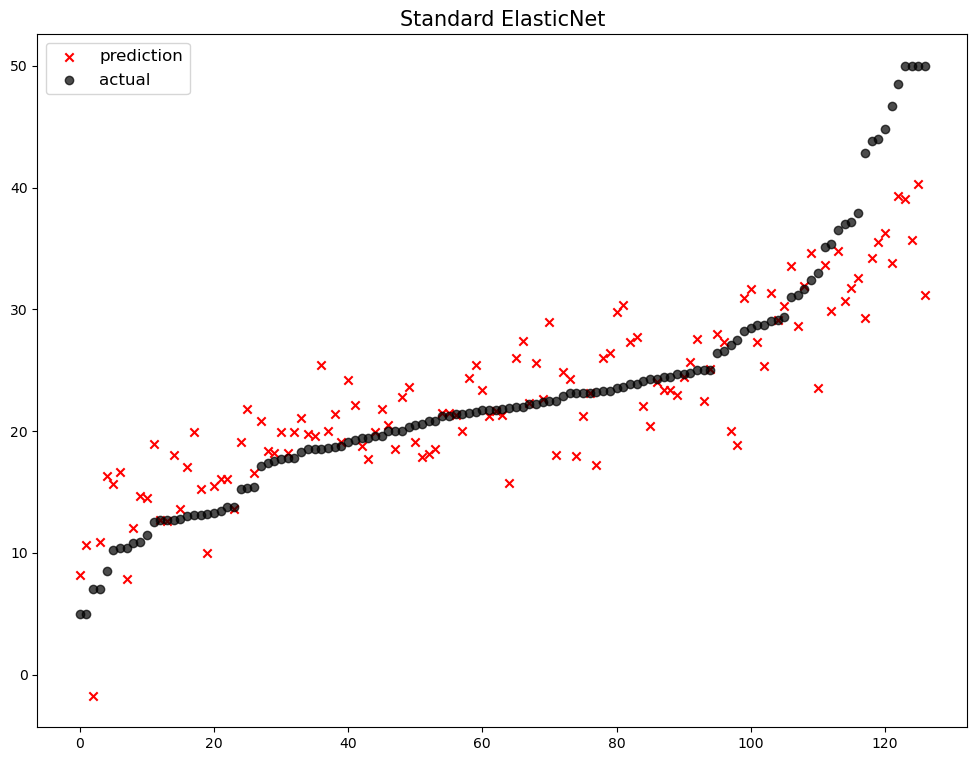

                        model        mse
0            Lasso(alpha=100)  71.850606
1             Lasso(alpha=10)  44.433756
2              Lasso(alpha=1)  32.294884
3   ElasticNet(l1_ratio= 0.2)  28.843444
4   ElasticNet(l1_ratio= 0.5)  28.710359
5   ElasticNet(l1_ratio= 0.8)  28.369449
6            Lasso(alpha=0.1)  25.241998
7            LinearRegression  23.732245
8         Lasso(alpha=0.0001)  23.731074
9          Lasso(alpha=0.001)  23.721040
10          Lasso(alpha=0.01)  23.671386
11        Standard ElasticNet  23.386458


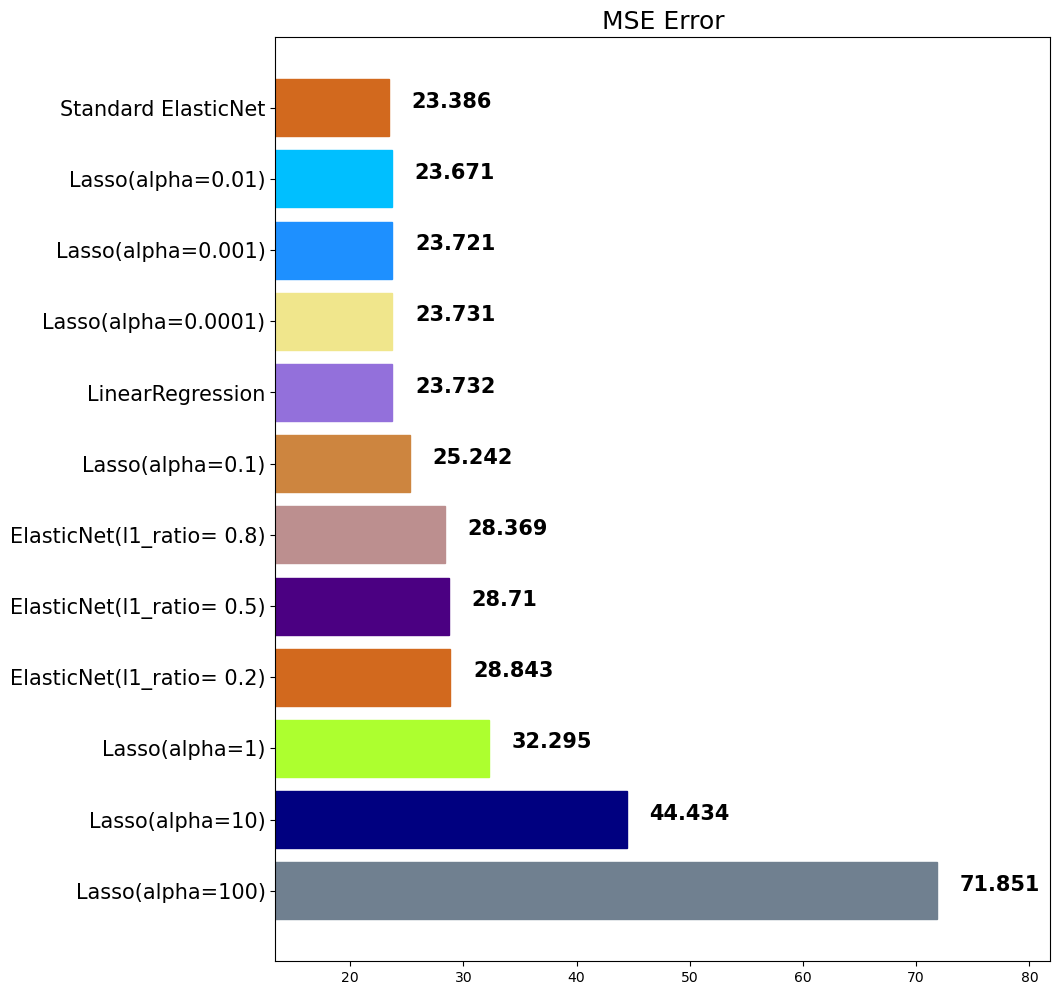

In [94]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

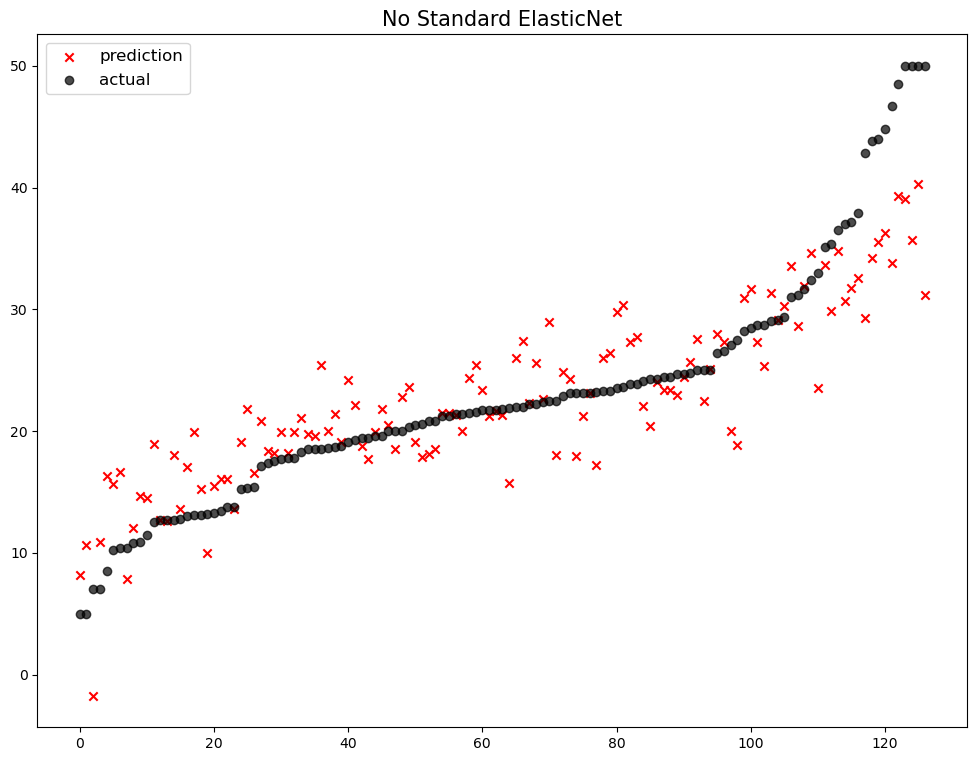

                        model        mse
0            Lasso(alpha=100)  71.850606
1             Lasso(alpha=10)  44.433756
2              Lasso(alpha=1)  32.294884
3   ElasticNet(l1_ratio= 0.2)  28.843444
4   ElasticNet(l1_ratio= 0.5)  28.710359
5   ElasticNet(l1_ratio= 0.8)  28.369449
6            Lasso(alpha=0.1)  25.241998
7            LinearRegression  23.732245
8         Lasso(alpha=0.0001)  23.731074
9          Lasso(alpha=0.001)  23.721040
10          Lasso(alpha=0.01)  23.671386
11        Standard ElasticNet  23.386458
12     No Standard ElasticNet  23.386458


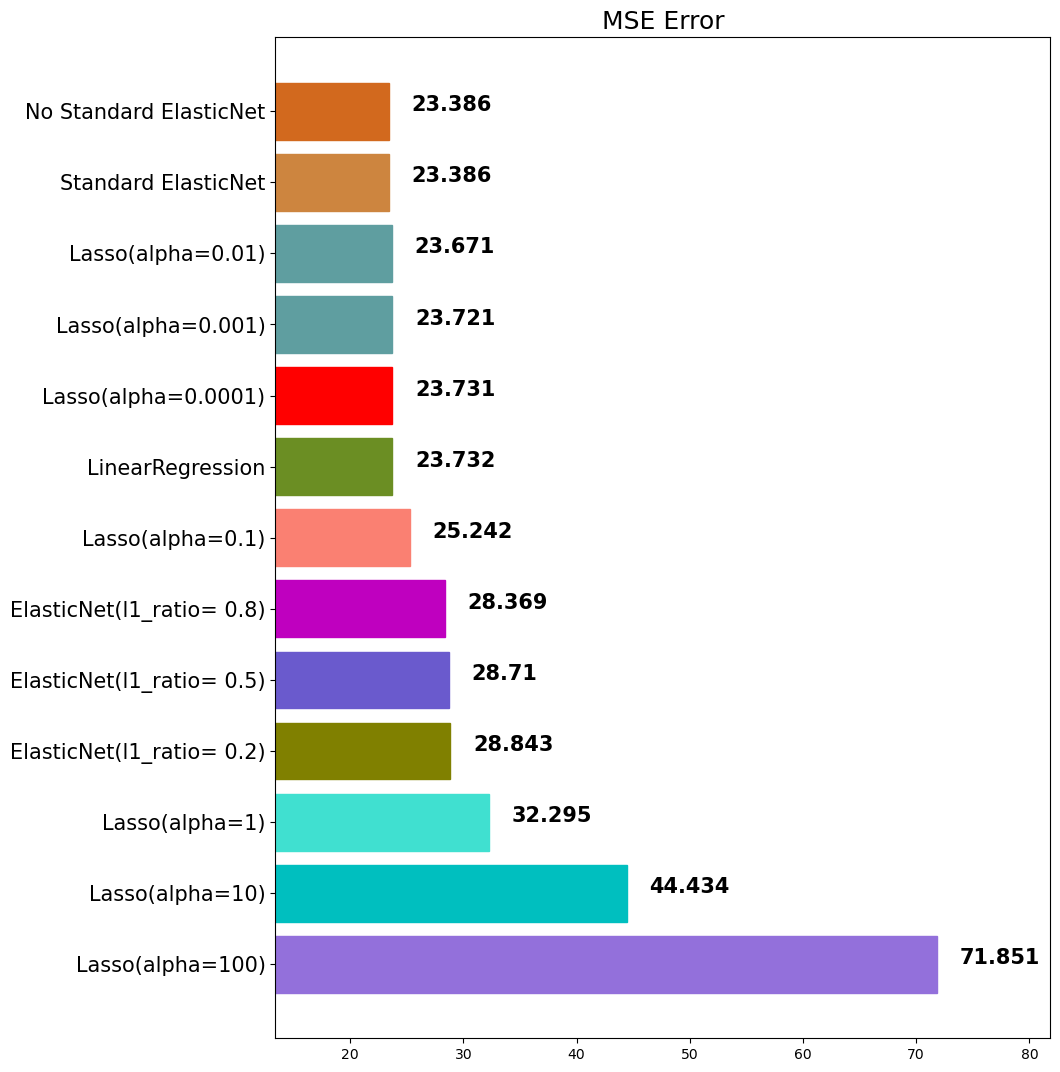

In [95]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(X_train, y_train).predict(X_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

### Polynominal Features
다항식의 계수간 상호작용을 통해 새로운 Feature를 생성한다. <br>
예를 들면 [a,b,]2개의 feature가 존재한다고 가정하고,<br>
degree를 2로 설정한다면 polynomial feature는 [1,a,b,a^2,ab,b^2]가 된다.

In [104]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train)[0]

In [105]:
poly_features

array([     0.55778   ,      0.        ,     21.89      ,      0.        ,
            0.624     ,      6.335     ,     98.2       ,      2.1107    ,
            4.        ,    437.        ,     21.2       ,    394.67      ,
           16.96      ,      0.31111853,      0.        ,     12.2098042 ,
            0.        ,      0.34805472,      3.5335363 ,     54.773996  ,
            1.17730625,      2.23112   ,    243.74986   ,     11.824936  ,
          220.1390326 ,      9.4599488 ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,    479.1721    ,      0.        ,
           13.65936   ,    138.67315   ,   2149.598     ,     46.203223  ,
           87.56      ,   9565.93      ,    464.068     ,   8639.3263    ,
          371.2544    ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [106]:
X_train.iloc[0]

CRIM         0.55778
ZN           0.00000
INDUS       21.89000
CHAS         0.00000
NOX          0.62400
RM           6.33500
AGE         98.20000
DIS          2.11070
RAD          4.00000
TAX        437.00000
PTRATIO     21.20000
B          394.67000
LSTAT       16.96000
Name: 135, dtype: float64

In [107]:
poly_pipeline = make_pipeline(
  PolynomialFeatures(degree=2, include_bias=False),
  StandardScaler(),
  ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [108]:
poly_pred = poly_pipeline.fit(X_train,y_train).predict(X_test)

c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.624e+01, tolerance: 3.076e+00
  model = cd_fast.enet_coordinate_descent(


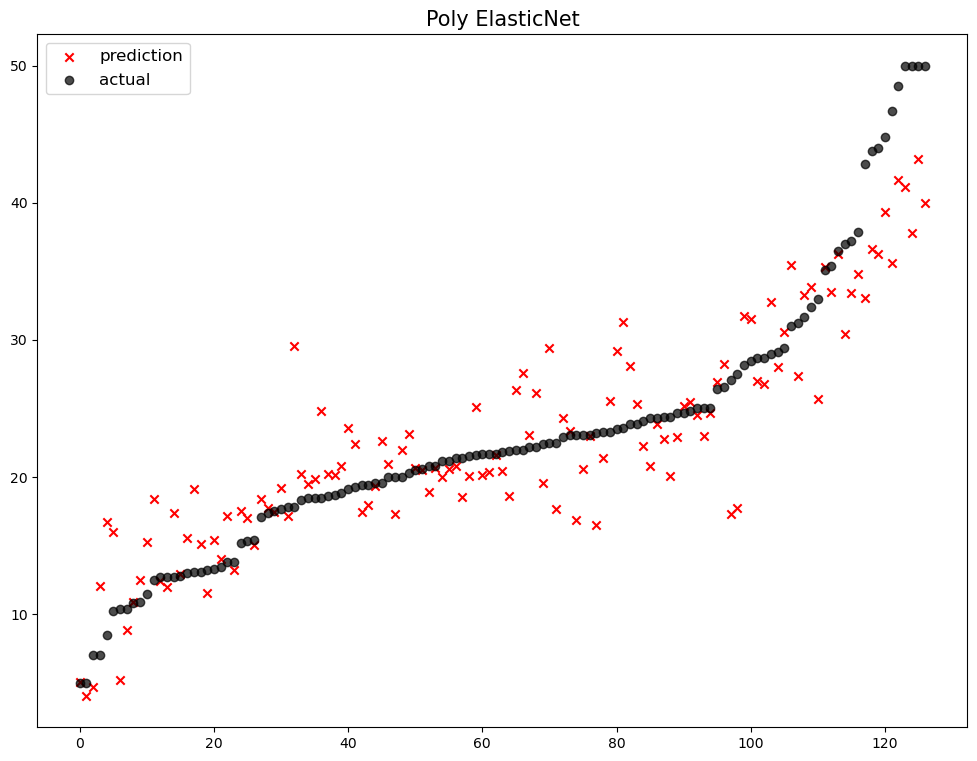

                        model        mse
0            Lasso(alpha=100)  71.850606
1             Lasso(alpha=10)  44.433756
2              Lasso(alpha=1)  32.294884
3   ElasticNet(l1_ratio= 0.2)  28.843444
4   ElasticNet(l1_ratio= 0.5)  28.710359
5   ElasticNet(l1_ratio= 0.8)  28.369449
6            Lasso(alpha=0.1)  25.241998
7            LinearRegression  23.732245
8         Lasso(alpha=0.0001)  23.731074
9          Lasso(alpha=0.001)  23.721040
10          Lasso(alpha=0.01)  23.671386
11        Standard ElasticNet  23.386458
12     No Standard ElasticNet  23.386458
13            Poly ElasticNet  17.358655


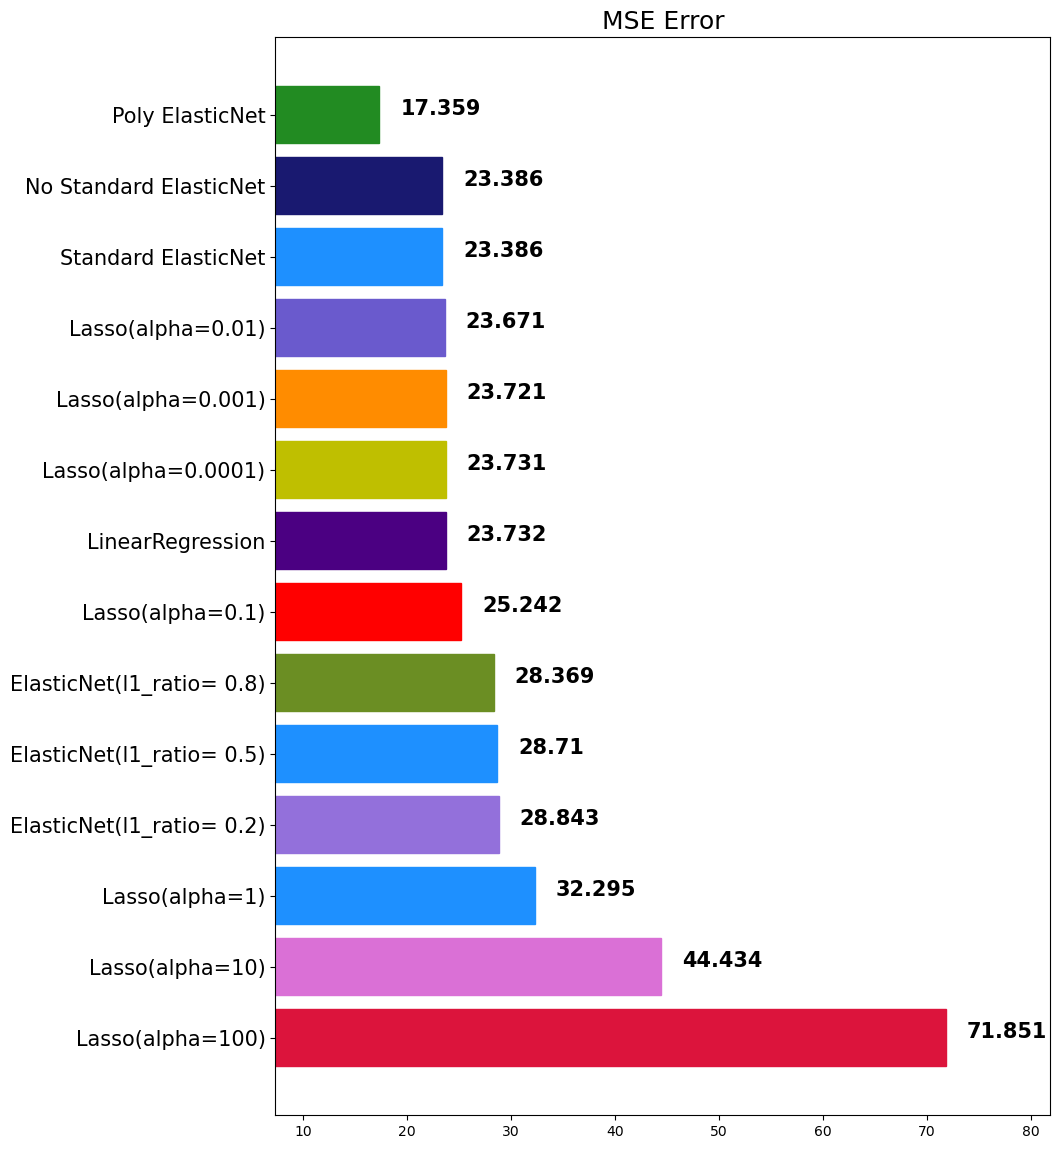

In [109]:
mse_eval('Poly ElasticNet', poly_pred, y_test)